<a href="https://colab.research.google.com/github/BraulioDGM12/SSF-Oto25_GalvezBraulio/blob/main/SSF_Oto25G%C3%A1lvezBraulio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T6)



A2

Para ε = 0.2, el valor mínimo de n es: 20
Para ε = 0.1, el valor mínimo de n es: 64
Para ε = 0.05, el valor mínimo de n es: 166


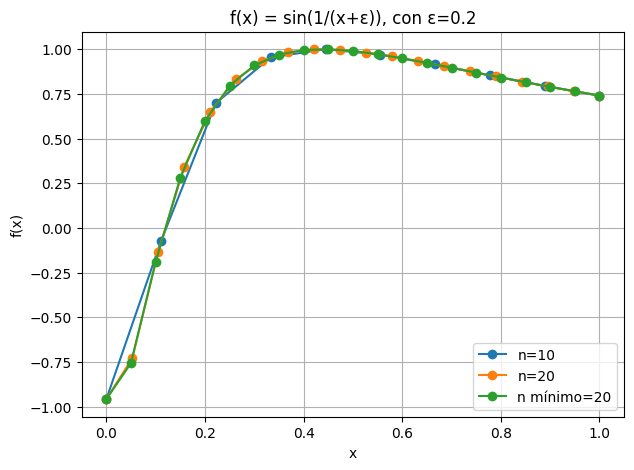

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función
def f(x, eps):
    return np.sin(1/(x + eps))

# Función que busca n mínimo para un epsilon dado
def encontrar_n_minimo(epsilon, tolerancia=0.1):
    n = 10
    while True:
        # malla fina común
        x_ref = np.linspace(0, 1, 2000)

        # nodos con n y n+10
        x_n = np.linspace(0, 1, n)
        x_n10 = np.linspace(0, 1, n+10)

        y_n = f(x_n, epsilon)
        y_n10 = f(x_n10, epsilon)

        # interpolación en la malla común
        y_n_ref = np.interp(x_ref, x_n, y_n)
        y_n10_ref = np.interp(x_ref, x_n10, y_n10)

        # diferencia máxima
        error_max = np.max(np.abs(y_n_ref - y_n10_ref))

        if error_max < tolerancia:
            return n
        n += 1

epsilons = [1/5, 1/10, 1/20]
n_minimos = {}

for eps in epsilons:
    n_min = encontrar_n_minimo(eps)
    n_minimos[eps] = n_min
    print(f"Para ε = {eps}, el valor mínimo de n es: {n_min}")

epsilon = 1/5
n_base = 10
n_mín = n_minimos[epsilon]  # recuperar el n mínimo hallado antes

# nodos
x_n = np.linspace(0, 1, n_base)
x_n10 = np.linspace(0, 1, n_base+10)
x_min = np.linspace(0, 1, n_mín+1)

# valores de la función
y_n = f(x_n, epsilon)
y_n10 = f(x_n10, epsilon)
y_min = f(x_min, epsilon)

# Graficar una sola vez
plt.figure(figsize=(7,5))
plt.plot(x_n, y_n, 'o-', label=f"n={n_base}")
plt.plot(x_n10, y_n10, 'o-', label=f"n={n_base+10}")
plt.plot(x_min, y_min, 'o-', label=f"n mínimo={n_mín}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(f"f(x) = sin(1/(x+ε)), con ε={epsilon}")
plt.grid()
plt.legend()
plt.show()


#T5) Integrales así chidas




Ejercicio 1




In [ ]:
import numpy as np
import pandas as pd
from numpy.polynomial.legendre import leggauss
from mpmath import quad, mp

mp.dps = 80

def trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def simpson_composite(f, a, b, n):
    if n < 2:
        raise ValueError("n debe ser >= 2")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    if n % 2 == 0:
        S = y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-2:2].sum()
        return S * h / 3.0
    else:
        m = n - 1
        S = y[0] + y[m] + 4*y[1:m:2].sum() + 2*y[2:m-1:2].sum()
        simpson_part = S * h / 3.0
        trap_last = h * 0.5 * (y[m] + y[m+1])
        return simpson_part + trap_last

def gauss_legendre(f, a, b, m):
    xi, wi = leggauss(m)
    xm = 0.5*(a + b); xr = 0.5*(b - a)
    return xr * np.sum(wi * f(xm + xr*xi))

def f(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)

a, b = -1.0, 1.0
# Referencia de alta precisión
ref = quad(lambda t: (1/np.sqrt(2*np.pi))*mp.e**(-0.5*t*t), [a, b])

rows = []

for n in [6, 15]:
    T = trapezoid(f, a, b, n)
    rows.append(("Trapezoide", n, T, abs(T - ref)))

for n in [6, 15]:
    S = simpson_composite(f, a, b, n)
    rows.append(("Simpson (compuesto)", n, S, abs(S - ref)))

for m in [6, 15]:
    G = gauss_legendre(f, a, b, m)
    rows.append((f"Gauss–Legendre {m} pts", m, G, abs(G - ref)))

df = pd.DataFrame(rows, columns=["Método", "n/pts", "Aproximación", "Error abs. vs. ref."])
print(df.to_string(index=False))
# Guardar resultados en un archivo de texto

with open("resultados1.txt", "w", encoding="utf-8") as f:
    f.write(df.to_string(index=False))

               Método  n/pts  Aproximación                                                                               Error abs. vs. ref.
           Trapezoide      6      0.678192              0.0044976683533302969133166878921356198429072740648533857812862098939054953987512508
           Trapezoide     15      0.681972             0.00071737569460925632488462713378520282497056752188463578128620989390549539875125085
  Simpson (compuesto)      6      0.682759            0.000069121817892781596082641158075616037944471540615364218713790106094504601248749155
  Simpson (compuesto)     15      0.682685            0.000004803630656335382742072283933326327701890764072135781286209893905495398751250845
 Gauss–Legendre 6 pts      6      0.682689        0.0000000050837002157957051348378326890109980943773533857812862098939054953987512508450434
Gauss–Legendre 15 pts     15      0.682689 0.00000000000000042133426697535038964422931321888907213578128620989390549539875125084504343135979


Ejercicio 2

In [ ]:

import numpy as np
import pandas as pd
from numpy.polynomial.legendre import leggauss
from mpmath import quad, mp

mp.dps = 80

def trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def simpson_composite(f, a, b, n):
    if n < 2:
        raise ValueError("n debe ser >= 2")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    if n % 2 == 0:
        S = y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-2:2].sum()
        return S * h / 3.0
    else:
        m = n - 1
        S = y[0] + y[m] + 4*y[1:m:2].sum() + 2*y[2:m-1:2].sum()
        simpson_part = S * h / 3.0
        trap_last = h * 0.5 * (y[m] + y[m+1])
        return simpson_part + trap_last

def gauss_legendre(f, a, b, m):
    xi, wi = leggauss(m)
    xm = 0.5*(a + b); xr = 0.5*(b - a)
    return xr * np.sum(wi * f(xm + xr*xi))

def f(x):
    return np.exp(x)*np.sin(x)/(1+x**2)

a, b = 0.0, 3.0
ref = quad(lambda t: mp.e**t*mp.sin(t)/(1+t**2), [a, b])

rows = []

for n in [6, 15, 20]:
    T = trapezoid(f, a, b, n)
    rows.append(("Trapezoide", n, T, abs(T - ref)))

for n in [6, 15, 20]:
    S = simpson_composite(f, a, b, n)
    rows.append(("Simpson (compuesto)", n, S, abs(S - ref)))

for m in [6, 15]:
    G = gauss_legendre(f, a, b, m)
    rows.append((f"Gauss–Legendre {m} pts", m, G, abs(G - ref)))

df = pd.DataFrame(rows, columns=["Método", "n/pts", "Aproximación", "Error abs. vs. ref."])
print(df.to_string(index=False))

with open("resultados2.txt", "w", encoding="utf-8") as f:
    f.write(df.to_string(index=False))


               Método  n/pts  Aproximación                                                                          Error abs. vs. ref.
           Trapezoide      6      2.821344          0.060293090335015692708136258435807992678921084959868676647181935147397718793638225
           Trapezoide     15      2.872045         0.0095921689047338726288918325662611620247767978504936766471819351473977187936382247
           Trapezoide     20      2.876244         0.0053934584475859476163142164222894804299281650379936766471819351473977187936382247
  Simpson (compuesto)      6      2.885402         0.0037645906719023064476667867057026727377964443370063233528180648526022812063617753
  Simpson (compuesto)     15      2.880503         0.0011339181909653833804687666924669043839381748036186766471819351473977187936382247
  Simpson (compuesto)     20      2.881649       0.000011287116416552330495404756255577343661922852631323352818064852602281206361775273
 Gauss–Legendre 6 pts      6      2.881643      

Ejercicio 3

In [ ]:

import numpy as np
import pandas as pd
from numpy.polynomial.legendre import leggauss
from mpmath import quad, mp

mp.dps = 80

def trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def simpson_composite(f, a, b, n):
    if n < 2:
        raise ValueError("n debe ser >= 2")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    if n % 2 == 0:
        S = y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-2:2].sum()
        return S * h / 3.0
    else:
        m = n - 1
        S = y[0] + y[m] + 4*y[1:m:2].sum() + 2*y[2:m-1:2].sum()
        simpson_part = S * h / 3.0
        trap_last = h * 0.5 * (y[m] + y[m+1])
        return simpson_part + trap_last

def gauss_legendre(f, a, b, m):
    xi, wi = leggauss(m)
    xm = 0.5*(a + b); xr = 0.5*(b - a)
    return xr * np.sum(wi * f(xm + xr*xi))

def f(x):
    return np.exp(x)*np.sin(x)/(1+x**2)

a, b = -2.0, 0.0
ref = quad(lambda t: mp.e**t*mp.sin(t)/(1+t**2), [a, b])

rows = []

for n in [6, 15, 20]:
    T = trapezoid(f, a, b, n)
    rows.append(("Trapezoide", n, T, abs(T - ref)))

for n in [6, 15, 20]:
    S = simpson_composite(f, a, b, n)
    rows.append(("Simpson (compuesto)", n, S, abs(S - ref)))

for m in [6, 15]:
    G = gauss_legendre(f, a, b, m)
    rows.append((f"Gauss–Legendre {m} pts", m, G, abs(G - ref)))

df = pd.DataFrame(rows, columns=["Método", "n/pts", "Aproximación", "Error abs. vs. ref."])
print(df.to_string(index=False))

with open("resultados3.txt", "w", encoding="utf-8") as f:
    f.write(df.to_string(index=False))


               Método  n/pts  Aproximación                                                                            Error abs. vs. ref.
           Trapezoide      6     -0.246627           0.0098437143172869280047959948616740703573456376335164257012644055283396839243154736
           Trapezoide     15     -0.254905           0.0015655048644270031830300370030859895041218369743367382012644055283396839243154736
           Trapezoide     20     -0.255590          0.00088017509483082631984110707450289651658445294113361320126440552833968392431547361
  Simpson (compuesto)      6     -0.256762          0.00029123587319104240610009651830788329336732928542888679873559447166031607568452639
  Simpson (compuesto)     15     -0.256037          0.00043383050506843332396137088395752385165601666183673820126440552833968392431547361
  Simpson (compuesto)     20     -0.256473        0.0000021912002766909757072978707905448982486159065226367987355944716603160756845263889
 Gauss–Legendre 6 pts      6     -

Ejercicio 4

In [ ]:
import numpy as np
import pandas as pd
from mpmath import quad, mp

mp.dps = 80

def simpson_composite(f, a, b, n):
    if n < 2:
        raise ValueError("n debe ser >= 2")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    if n % 2 == 0:
        S = y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-2:2].sum()
        return S * h / 3.0
    else:
        m = n - 1
        S = y[0] + y[m] + 4*y[1:m:2].sum() + 2*y[2:m-1:2].sum()
        simpson_part = S * h / 3.0
        trap_last = h * 0.5 * (y[m] + y[m+1])
        return simpson_part + trap_last

def f(x):
    return np.exp(x)/x

def g(x):
    return (1-np.exp(x))/x

a_eps = [1e-1, 1e-3, 1e-6]
b = 5.0

rows_f = []
ref_f = quad(lambda t: (mp.e**t)/t, [0, b])
for eps in a_eps:
    # Usar Simpson con subintérvalos [eps, b]
    n = 2000
    val = simpson_composite(f, eps, b, n)
    rows_f.append((eps, n, val))

# For g(x), integral es propia si interpertamos el límite a 0 , con g~ -1 cercano a 0.
# Evaluar con un épsilon chiquitito para estabilidad y que converja
rows_g = []
ref_g = quad(lambda t: (1-mp.e**t)/t, [0, b])  # integral impropia de mpmath
for eps in a_eps:
    n = 2000
    val = simpson_composite(g, eps, b, n)
    rows_g.append((eps, n, val, abs(val - ref_g)))

import pandas as pd
df_f = pd.DataFrame(rows_f, columns=["epsilon (límite inferior)", "n (subintervalos)", "Integral aprox. de e^x/x en [eps,5]"])
df_g = pd.DataFrame(rows_g, columns=["epsilon (límite inferior)", "n (subintervalos)", "Integral aprox. de (1-e^x)/x", "Error abs. vs ref. mpmath"])

print("f(x) = e^x/x (integral impropia):")
print(df_f.to_string(index=False))
print("\nObservación: al reducir epsilon, el valor crece sin cota (diverge logarítmicamente).")
print(f"\nReferencia mpmath (impropia) para f(x) en [0,5]: {ref_f}")
print("\nObservación: La integral de f(x) diverge logarítmicamente cuando ε → 0⁺.")

print("\ng(x) = (1-e^x)/x en (0,5]:")
print(df_g.to_string(index=False))
print(f"\nReferencia mpmath (impropia) para g(x) en [0,5]: {ref_g}")

with open("resultados4.txt", "w", encoding="utf-8") as f:
    f.write("f(x) = e^x/x (integral impropia):\n")
    f.write(df_f.to_string(index=False))
    f.write(f"\n\nReferencia mpmath: {ref_f}")
    f.write("\n\nEsto muestra cómo diverge la función")
    f.write("\n\n")
    f.write("g(x) = (1-e^x)/x en (0,5]:\n")
    f.write(df_g.to_string(index=False))
    f.write(f"\n\nReferencia mpmath: {ref_g}")

f(x) = e^x/x (integral impropia):
 epsilon (límite inferior)  n (subintervalos)  Integral aprox. de e^x/x en [eps,5]
                  0.100000               2000                            41.808088
                  0.001000               2000                            46.648347
                  0.000001               2000                           879.740187

Observación: al reducir epsilon, el valor crece sin cota (diverge logarítmicamente).

Referencia mpmath (impropia) para f(x) en [0,5]: 232.20124671299132827505602527772341360608366692613017750999943124940002822407659

Observación: La integral de f(x) diverge logarítmicamente cuando ε → 0⁺.

g(x) = (1-e^x)/x en (0,5]:
 epsilon (límite inferior)  n (subintervalos)  Integral aprox. de (1-e^x)/x                                                                Error abs. vs ref. mpmath
                  0.100000               2000                    -37.896065       0.10255661411975539703242451650768946991968608398748911346446012528

#T4) Datos de estrellas y estaturas

Estrellas con numpy

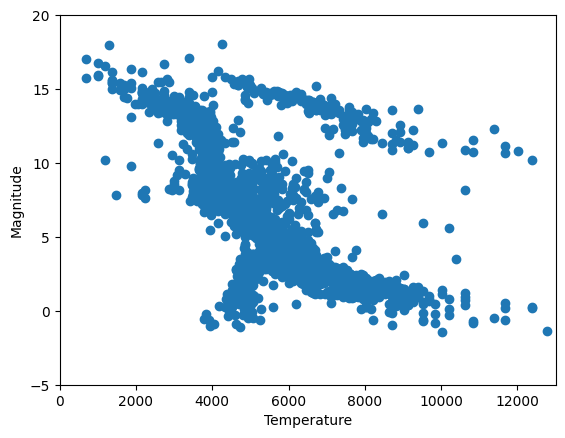

In [ ]:
#!/usr/bin/env python
from __future__ import print_function,division
### http://www-personal.umich.edu/~mejn/computational-physics/

from pylab import scatter,xlabel,ylabel,xlim,ylim,show
from numpy import loadtxt

data = loadtxt("stars.dat",float)
x = data[:,0]
y = data[:,1]

scatter(x,y)
xlabel("Temperature")
ylabel("Magnitude")
xlim(0,13000)
ylim(-5,20)
show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Estrellas sin pylab

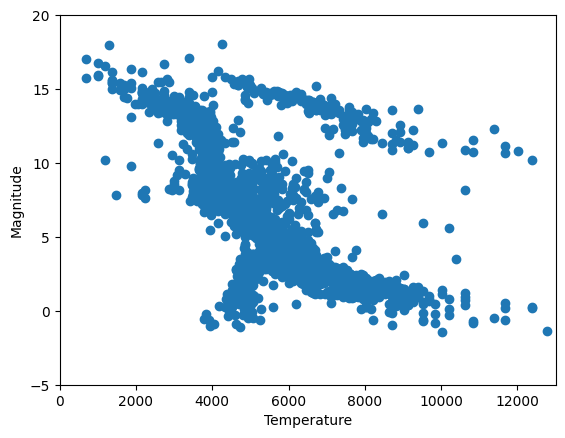

In [ ]:

#!/usr/bin/env python
from __future__ import print_function,division
### http://www-personal.umich.edu/~mejn/computational-physics/

#Sin pylab
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo de datos
data = np.loadtxt("stars.dat", float)
x = data[:, 0]   # Temperatura
y = data[:, 1]   # Magnitud

# Crear figura y ejes
plt.scatter(x, y)

# Etiquetas y límites
plt.xlabel("Temperature")
plt.ylabel("Magnitude")
plt.xlim(0, 13000)
plt.ylim(-5, 20)

# Mostrar la gráfica
plt.show()


In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# Cargar los archivos de datos
dataA = np.loadtxt("altura5.dat", float)
dataB = np.loadtxt("altura6.dat", float)


x      = dataA[:,0]
freq1  = dataA[:,1]
freq2  = dataA[:,2]
freq3  = dataA[:,3]

# Crear figura con 3 subplots en columnas
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# Primer histograma
axes[0].bar(x, freq1, width=(x[1]-x[0]), color="red", edgecolor="black", alpha=0.7)
axes[0].set_ylabel("Frecuencia 1")
axes[0].set_title("Histograma 1", color="red")

# Segundo histograma
axes[1].bar(x, freq2, width=(x[1]-x[0]), color="green", edgecolor="black", alpha=0.7)
axes[1].set_ylabel("Frecuencia 2")
axes[1].set_title("Histograma 2", color="green")

# Tercer histograma
axes[2].bar(x, freq3, width=(x[1]-x[0]), color="blue", edgecolor="black", alpha=0.7)
axes[2].set_ylabel("Frecuencia 3")
axes[2].set_xlabel("Valor")
axes[2].set_title("Histograma 3", color="blue")

plt.tight_layout()
plt.xlim(1.6,1.8)
plt.ylim(0,120)
plt.show()

# Graficar histograma de dataB
plt.hist(dataB, bins=5, color="skyblue", edgecolor="black")  # puedes ajustar bins

# Etiquetas
plt.xlabel("Estatura")
plt.ylabel("Frecuencia")
plt.ylim(19000,21000)
plt.xlim(1.5, 2)
plt.title("Histograma de dataB (100,000 datos)")

# Mostrar gráfica
plt.show()



# Método de Horner y Cos (T3)

In [ ]:
def poly_horner(A, x):
    p0 = A[-1]           # Empieza con el coeficiente de mayor grado (a_n)
    i = len(A) - 2      # Índice del siguiente coeficiente
    while i >= 0:
        p0 = p0 * x + A[i]  # Aplica Horner: p0 = (p0 * x) + siguiente coeficiente
        i -= 1            # Decimos que ahora i=i-1
    return p0              # Guarda p0


def poly_naive(A, x):
    p1 = 0
    for i, a in enumerate(A):
        p1 += (x ** i) * a
    return p1

def poly_iter(A, x):
    p2 = 0
    xn = 1
    for a in A:
        p2 += xn * a
        xn *= x
    return p2

A = [-19, 7, -4, 6]     #Definimos la lista de coeficientes
x=20         # Definimos la variable x
print(f"Para el método Horner el resultado es: {poly_horner(A, x)}")
print(f"Para el método Naive el resultado es: {poly_naive(A, x)}")
print(f"Para el método Iter el resultado es: {poly_iter(A, x)}")

Para el método Horner el resultado es: 46521
Para el método Naive el resultado es: 46521
Para el método Iter el resultado es: 46521


In [ ]:
import math
import csv

# Serie directa
def cos_series_direct(x, tol=1e-8, CosenoReal=None):
    suma = 0
    n = 0
    term = 1
    results = []
    while abs(term) > tol:
        term = ((-1)**n) * (x**(2*n)) / math.factorial(2*n)
        suma += term
        error_rel = abs(suma - CosenoReal) / abs(CosenoReal)
        results.append((n, suma, error_rel))
        n += 1
    return results

# Serie parcial
def cos_series_partial(x, tol=1e-8, CosenoReal=None):
    suma = 0
    n = 0
    term = 1
    results = []
    while abs(term) > tol:
        suma += term
        error_rel = abs(suma - CosenoReal) / abs(CosenoReal)
        results.append((n, suma, error_rel))
        # siguiente término
        term *= - (x**2) / ((2*n+1)*(2*n+2))
        n += 1
    return results

# Función para guardar resultados en CSV
def guardar_csv(nombre, x, results, CosenoReal):
    with open(nombre, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["x", "Iteración", "Suma", "|Suma-cos(x)|/cos(x)"])
        for n, suma, error_rel in results:
            writer.writerow([x, n, f"{suma:.10f}", f"{abs(suma-CosenoReal)/CosenoReal:.10e}"])

# Ejemplo
x =90
CosenoReal = math.cos(x)

# Generar resultados
res_direct_1e4 = cos_series_direct(x, 1e-4, CosenoReal)
res_direct_1e8 = cos_series_direct(x, 1e-8, CosenoReal)
res_partial_1e4 = cos_series_partial(x, 1e-4, CosenoReal)
res_partial_1e8 = cos_series_partial(x, 1e-8, CosenoReal)

# Guardar CSVs
guardar_csv("serie_directa_tol1e-4.csv", x, res_direct_1e4, CosenoReal)
guardar_csv("serie_directa_tol1e-8.csv", x, res_direct_1e8, CosenoReal)
guardar_csv("serie_parcial_tol1e-4.csv", x, res_partial_1e4, CosenoReal)
guardar_csv("serie_parcial_tol1e-8.csv", x, res_partial_1e8, CosenoReal)

print("Archivos CSV generados, según yo") #Profesor, si está viendo esto y no encuentra los archivos en collab
# están en la parte izquierda donde está el símbolo de una carpeta. Supongo que ya lo sabe, pero por si las dudas.
print(f"El valor del cos({x}) es: {CosenoReal}")

Archivos CSV generados, según yo
El valor del cos(90) es: -0.4480736161291701
